##Introduction
Le traitement automatique du langage naturel est un domaine de l'intelligence artificielle qui vise à permettre aux machines de comprendre et d'interagir avec le langage humain. Dans le cadre de ce projet, nous nous concentrons sur une tâche fondamentale du NLP : la classification des sentiments. L'objectif principal est de développer un modèle de classification de sentiments en utilisant l'algorithme Naive Bayes.

##Import des bibliothèques

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Collecte de données

In [ ]:
#les sources de données
noms_fichiers = ['/content/amazon_cells_labelled.txt', '/content/imdb_labelled.txt', '/content/yelp_labelled.txt']

#Créez une liste pour Concaténer les données
donnees = []
for nom_fichier in noms_fichiers:
    with open(nom_fichier, 'r') as fichier:
        lignes = fichier.readlines()
        for ligne in lignes:
            # Divisez la ligne en deux parties puisque on a une phrases et son label
            partie1, partie2 = ligne.strip().split('\t', 1)
            donnees.append([partie1, partie2])

#Créez une DataFrame à partir de la liste de données
data = pd.DataFrame(donnees, columns=["phrases", "étiquette"])


##Visualisation des données

In [ ]:
data.shape

(3000, 2)

** le data contient 3000 lignes et 2 colonnes .

In [ ]:
data.head()

,phrases,étiquette
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
data.isnull().sum()

phrases      0
étiquette    0
dtype: int64

** il n'y a pas de valeur nulle  .

In [ ]:
data.duplicated().sum()

17

**nous avons 17 lignes dupliquer .

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

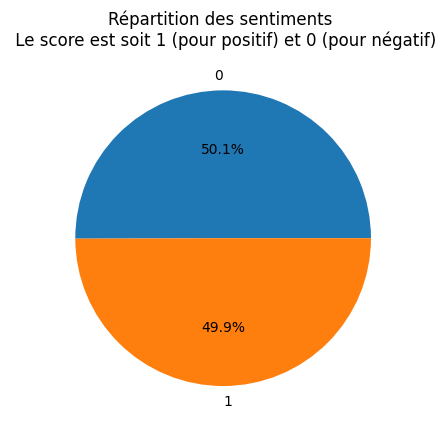

In [ ]:
#Comptez la fréquence des étiquettes (sentiments)
sentiment_counts = data["étiquette"].value_counts()

#Créez un diagramme circulaire pour représenter la répartition des sentiments
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%")
plt.title("Répartition des sentiments \n Le score est soit 1 (pour positif) et 0 (pour négatif)")
plt.show()

## Prétraitement des données





In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
en_stopwords=set(stopwords.words('english'))
ps=PorterStemmer()

In [ ]:
def getcleanedtext(text):
  #Conversion en minuscules
  text=text.lower()
  #Tokenization
  tokens=tokenizer.tokenize(text)
  #Filtre des mots d'arrêt
  new_tokens=[token for token in tokens if token not in en_stopwords]
  #Racinisation
  stemmed_tokens=[ps.stem(tokens)for tokens in new_tokens]
  clean_text=" ".join(stemmed_tokens)
  return clean_text

In [ ]:
x= data["phrases"]
x

0       So there is no way for me to plug it in here i...
1                             Good case, Excellent value.
2                                  Great for the jawbone.
3       Tied to charger for conversations lasting more...
4                                       The mic is great.
                              ...                        
2995    I think food should have flavor and texture an...
2996                             Appetite instantly gone.
2997    Overall I was not impressed and would not go b...
2998    The whole experience was underwhelming, and I ...
2999    Then, as if I hadn't wasted enough of my life ...
Name: phrases, Length: 3000, dtype: object

In [ ]:
clean_data = [getcleanedtext(i) for i in x]

In [ ]:
clean_data

['way plug us unless go convert',
 'good case excel valu',
 'great jawbon',
 'tie charger convers last 45 minut major problem',
 'mic great',
 'jiggl plug get line right get decent volum',
 'sever dozen sever hundr contact imagin fun send one one',
 'razr owner must',
 'needless say wast money',
 'wast money time',
 'sound qualiti great',
 'impress go origin batteri extend batteri',
 'two seper mere 5 ft start notic excess static garbl sound headset',
 'good qualiti though',
 'design odd ear clip comfort',
 'highli recommend one blue tooth phone',
 'advis everyon fool',
 'far good',
 'work great',
 'click place way make wonder long mechan would last',
 'went motorola websit follow direct could get pair',
 'bought use kindl fire absolut love',
 'commerci mislead',
 'yet run new batteri two bar three day without charg',
 'bought mother problem batteri',
 'great pocket pc phone combin',
 'own phone 7 month say best mobil phone',
 'think instruct provid help',
 'peopl couldnt hear talk pul

## Vectorisation du texte


In [ ]:
etiquettes = data['étiquette'].tolist()


In [ ]:
#Séparez les données
X = clean_data
y = etiquettes

#Divisez les données en ensembles d'entraînement et de test (80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cv = CountVectorizer(ngram_range=(1, 2))
x_vec = cv.fit_transform(X_train).toarray()
print(cv.get_feature_names_out())
xt_vect = cv.transform(X_test).toarray()


['00' '10' '10 10' ... 'zombi movi' 'zombiez' 'zombiez part']


##Entraînement du modèle Naive Bayes



In [ ]:
#Créer le modèle Naive Bayes multinomial (MultinomialNB).
mnb=MultinomialNB()
#Entraînez le modèle
mnb.fit(x_vec,y_train)
#Utiliser le modèle entraîné pour prédire les étiquettes des données de test (xt_vect) et d'entraînement (x_vec).
mnb_pred=mnb.predict(xt_vect)
mnb_tr_pred=mnb.predict(x_vec)
#Calculer accuracy des prédictions sur les données de test (y_test) et d'entraînement (y_train).
#Calculer precision des prédictions sur les données de test (y_test) et d'entraînement (y_train)
#en utilisant la métrique "macro" (moyenne pondérée).
mnb_acc=accuracy_score(y_test,mnb_pred)
mnb_prec=precision_score(y_test,mnb_pred,average='macro')
mnb_tr_acc=accuracy_score(y_train,mnb_tr_pred)
mnb_tr_prec=precision_score(y_train,mnb_tr_pred,average='macro')

In [ ]:
print("accuracy score sur le data train : ",mnb_tr_acc)
print("Précision score sur le data test : ",mnb_tr_prec)

print("accuracy score sur le data train : ",mnb_acc)
print("Précision score sur le data test : ",mnb_prec)

accuracy score sur le data train :  0.9770833333333333
Précision score sur le data test :  0.977173719772404
accuracy score sur le data train :  0.8066666666666666
Précision score sur le data test :  0.8066645184946499


##Évaluation du modèle


Dans le cadre de notre projet d'analyse des sentiments, nous avons suivi plusieurs étapes,
 notamment :
1.  la collecte de données
2.  le prétraitement de données
3.  la vectorisation des données,
4.  l'entraînement d'un modèle de classification
5.  l'évaluation des performances.

Voici maintenant une interprétation des principaux résultats obtenus :

1.   Accuracy Score :

*   accuracy est de 97,71 %, ce qui signifie que le modèle prédit correctement près de 97,71 % des étiquettes sur l'ensemble d'entraînement. Cela suggère une très bonne performance de modèle sur les données d'entraînement.
*  Sur les données de test,accuracy est de 80,67 %, ce qui signifie que le modèle prédit correctement environ 80,67 % des étiquettes sur l'ensemble de test.

2.   Précision Score :

*  La précision est de 97,72 %, ce qui signifie que parmi les exemples que le modèle a prédits comme positifs, 97,72 % d'entre eux étaient réellement positifs. Cela indique une bonne capacité de modèle à prédire positivement les échantillons d'entraînement.
*   Sur les données de test, La précision est de 80,67 %, ce qui signifie que parmi les exemples que le modèle a prédits comme positifs sur l'ensemble de test, 80,67 % d'entre eux étaient réellement positifs. La précision sur l'ensemble de test est similaire à celle de l'ensemble d'entraînement, ce qui est un bon signe de la capacité de généralisation de votre modèle.






##Tester de nouveux données

In [ ]:
#Créer et adapter le CountVectorizer
cvector = CountVectorizer()
X_train_vectorized = cvector.fit_transform(X_train)

user_text = 'I hope that the next years will be special and happy'
transformed_user_text = cvector.transform([user_text])

#Créer ou charge le modèle de Naïve Bayes
naive_bayes_model = MultinomialNB()

#Entraîner le modèle sur les données d'entraînement vectorisées
naive_bayes_model.fit(X_train_vectorized, y_train)

#Maintenant que le modèle est adapté,je fait les prédictions
user_text_vectorized = cvector.transform([user_text])
prediction = naive_bayes_model.predict(user_text_vectorized)

if prediction == 0:
    print("Emotion négatif")
else:
    print("Emotion positif")


Emotion positif


<ipython-input-53-9b7aab7ce5e0>:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if prediction == 0:


##Conclusion
En conclusion, ce projet m'a permis de plonger dans le domaine du traitement automatique du langage naturel en développant un modèle de classification des sentiments avec l'algorithme Naive Bayes. J'ai constaté que Naive Bayes affiche des performances prometteuses dans l'analyse de texte, bien que le NLP soit en constante évolution, offrant de nombreuses opportunités d'amélioration.